### **Rock-vs-Metal-Classification**

# **Introduction - Problem Definition**



The focus of this project will be the Sonar Mines vs Rocks dataset. The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.


Dataset can find click by this link:  https://www.kaggle.com/mattcarter865/mines-vs-rocks


## **Overview**
1. **Exploratory Data Analysis (EDA)**
  *  Missing Values Analysis
2. **Feature Engineering**
  *  Check the Correlation Vlues
  *  Apply variance therosholds Method
  *  Drop most corelated values
3. **Traditional Modelling**
  *  Logistic Regression
  *  MultinomialNB
  *  Hyper parameter tuning for MultinomialNB
  *  SVM(Support Vector Machine)
  *  Precision and Recall comparison
  *  ROC curve
  *  Randomforest
  *  CV random search with hyperparameter Tuning 


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [4]:
# Read the dataset
url='/content/drive/MyDrive/sonar.all-data.csv'
data=pd.read_csv(url,header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
# read the information about the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

Among 61 feature, the Only dependent variable is the object variable. Others like float variable.

In [7]:
#find the null value 
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

Text(0.5, 1.0, 'Check the null values of the data set')

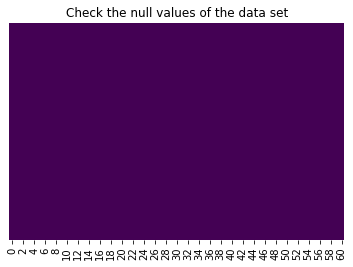

In [9]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Check the null values of the data set")

By visiualizing the heat map we can see there is no null value in our dataset.

In [8]:
#Find the shape of the data set
data.shape

(208, 61)

In [21]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.36614,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.44568,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Reliable vs Unreliable Distribution')

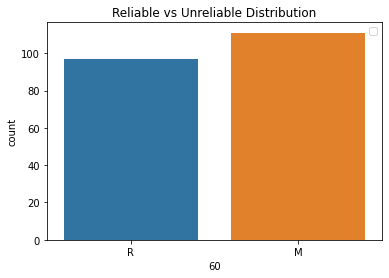

In [22]:
#Spam vs Non Spam Distribution
sns.countplot(data[60])
plt.legend()
plt.title("Reliable vs Unreliable Distribution")

Our output variable more or less balanced

In [87]:
data[60].replace('R',0,inplace=True)
data[60].replace('M',1,inplace=True)

<Figure size 4000x3600 with 0 Axes>

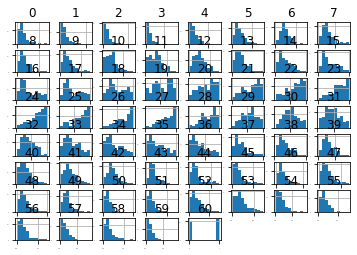

In [86]:
# histograms for all features
from matplotlib.pyplot import figure
figure(figsize=(20, 18), dpi=200)
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponential-like distributions for other attributes.

Let's take a look at the same perspective of the data using density plots.

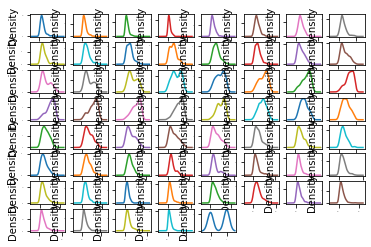

In [80]:
# density for all features
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

So, dataset has 60 features So, we have to check the covariance between the each features.
There are lots way, In this notebook we are goig to apply only few methods to over come from the feature dependencese.
1. Variance threshold
2. Covariance

### **Apply the variance threshold**

In [33]:
from sklearn.feature_selection import VarianceThreshold

In [34]:
var_thresh=VarianceThreshold(threshold=0.0)
var_thresh.fit(data.iloc[:,:-1])

VarianceThreshold(threshold=0.0)

In [35]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [14]:
### Finding non constant features
sum(var_thresh.get_support())

60

In [15]:
constant_columns = [column  for column in data.iloc[:,:-1].columns
                    if column not in data.iloc[:,:-1].columns[var_thresh.get_support()]]

print(len(constant_columns))

0


By Using variance threshold method, We can not see much variance from the each features.

### Appling correlation method

In [16]:
# Correlation of the each features.
data.iloc[:,:-1].corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,0.344058,0.210861,0.210722,0.256278,0.304878,0.239079,0.137845,0.041817,0.055227,0.156760,0.117663,-0.056973,-0.163426,-0.218093,-0.295683,-0.342865,-0.341703,-0.224340,-0.199099,-0.077430,-0.048370,-0.030444,-0.031939,0.031319,0.098118,0.080722,0.119565,0.209873,0.208371,0.099993,0.127313,0.213592,0.206057,0.157949,0.279968,0.319354,0.230343,0.203234,0.247560,0.269287,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,0.297065,0.194102,0.249596,0.273170,0.307599,0.261844,0.152170,0.042870,0.040911,0.102428,0.075255,-0.074157,-0.179365,-0.196469,-0.295302,-0.365749,-0.337046,-0.234386,-0.228490,-0.115301,-0.055862,-0.049683,-0.108272,-0.004247,0.115824,0.132611,0.169186,0.217494,0.186828,0.098350,0.188226,0.261345,0.186368,0.133018,0.285716,0.304247,0.255797,0.265279,0.313995,0.245868,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,0.274610,0.214807,0.258767,0.291724,0.285663,0.237017,0.201093,0.120587,0.099303,0.103117,0.063990,-0.026815,-0.073400,-0.085380,-0.214256,-0.291974,-0.263111,-0.256674,-0.290728,-0.197493,-0.106198,-0.109895,-0.170671,-0.099409,0.017053,0.053070,0.107530,0.130276,0.110499,0.074137,0.189047,0.233442,0.113920,0.071946,0.180734,0.173649,0.179528,0.234896,0.223074,0.081096,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,0.271881,0.175381,0.215754,0.286708,0.278529,0.248245,0.223203,0.194992,0.189405,0.188317,0.142271,0.036010,-0.029749,-0.102975,-0.206673,-0.291357,-0.294749,-0.256074,-0.300476,-0.236602,-0.190086,-0.169987,-0.164651,-0.083965,0.015200,0.039282,0.063486,0.089887,0.089346,0.045141,0.145241,0.144693,0.050629,-0.008407,0.087824,0.080012,0.046109,0.121065,0.133294,0.077925,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,0.231684,0.211657,0.299086,0.359062,0.318059,0.328725,0.326477,0.299266,0.340543,0.285737,0.205088,0.152897,0.073934,-0.000624,-0.067296,-0.125675,-0.169618,-0.214692,-0.283863,-0.273350,-0.214336,-0.173485,-0.200586,-0.140559,-0.086529,-0.073481,-0.064617,-0.008620,0.063408,0.061616,0.098832,0.125181,0.063706,0.031575,0.089202,0.081964,0.041419,0.084435,0.088128,0.066751,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,0.333570,0.344451,0.411107,0.396233,0.367908,0.353783,0.293190,0.235778,0.226305,0.206841,0.174768,0.123770,0.064081,0.027026,-0.043280,-0.100309,-0.129094,-0.118645,-0.156081,-0.151186,-0.054136,-0.051934,-0.144391,-0.070337,-0.028815,-0.023621,-0.064798,-0.048745,0.030599,0.081119,0.075797,0.048763,0.034380,0.048870,0.085468,0.029524,0.016640,0.067196,0.080729,0.017300,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,0.396588,0.274432,0.365391,0.409576,0.411692,0.363086,0.250024,0.208057,0.215495,0.196496,0.165827,0.063773,0.009359,0.011982,-0.057147,-0.126074,-0.179526,-0.116848,-0.129694,-0.068142,-0.096945,-0.115871,-0.127052,-0.077662,-0.015531,0.002979,-0.001376,0.065900,0.080942,0.112673,0.041071,-0.028720,-0.025727,0.061404,0.110813,0.076537,0.098925,0.155221,0.194720,0.166112,0.184152,0.144051,0.046403,0.16

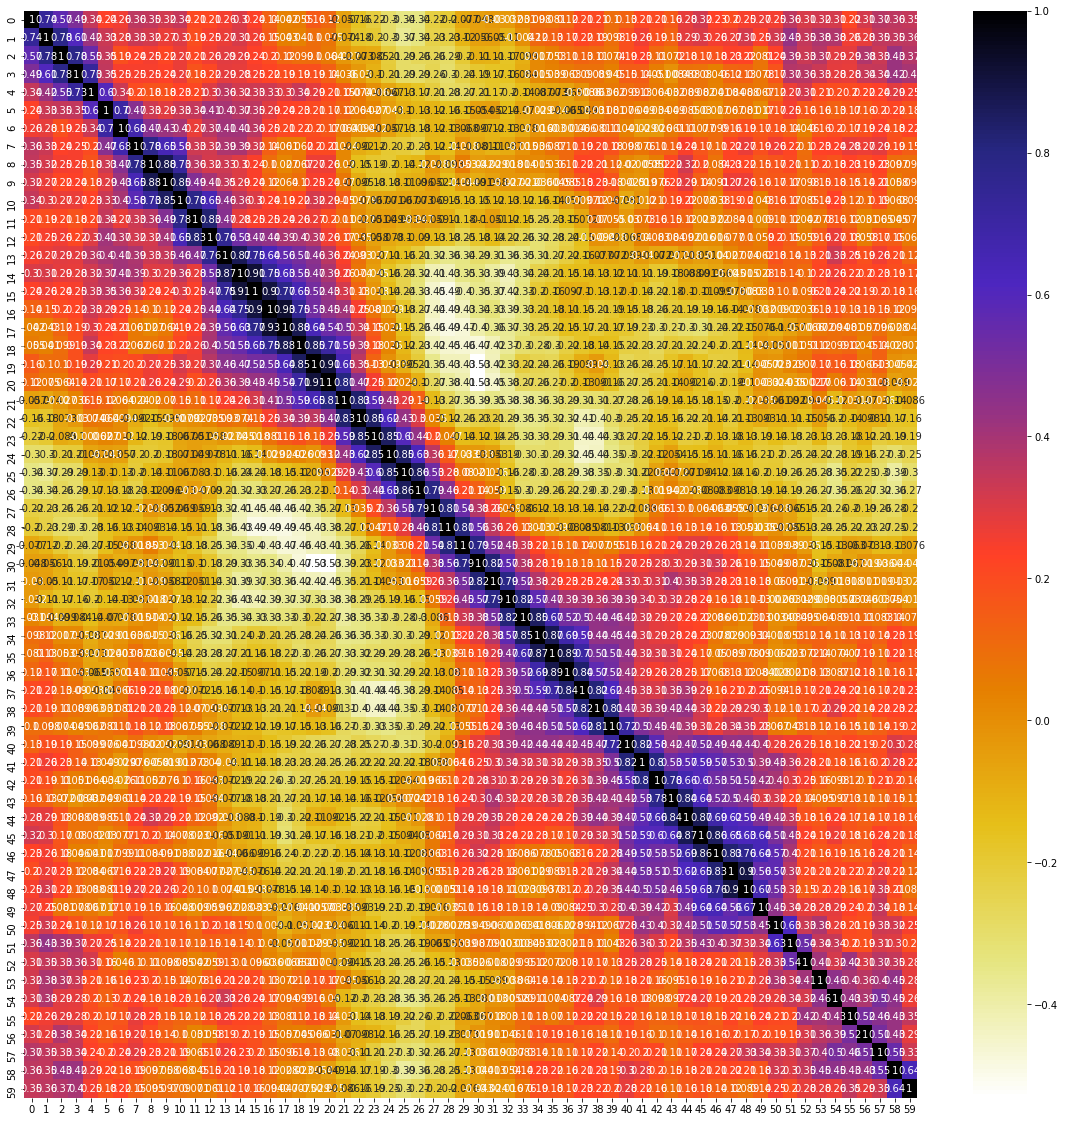

In [36]:
## Visualizing the correlation value in the heatmap
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = data.iloc[:,:-1].corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [37]:
#Find the correlation which are the features are high correlated with each Other.
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
cor_feature=correlation(data.iloc[:,:-1],0.90)
len(cor_feature)

3

From Analysis we could see theree features are highly corelated with each other.

In [38]:
# now we will drop those feaure from our dataset
newdata=data.iloc[:,:-1].drop(cor_feature,axis=1)


 New dataset Shape

In [42]:
print(newdata.shape)
print(data.shape)

(208, 57)
(208, 61)


In [41]:
newdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.3100,0.5078,0.4797,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,1.0000,0.8024,0.7818,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6759,0.8929,0.8619,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.0693,0.4060,0.3973,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.7306,0.2032,0.4636,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [23]:
from sklearn.model_selection import train_test_split

In [43]:
X=newdata
Y=data[60]

In [46]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=100)

### **Define Function for Confiusion matrix, ROC curve and modeling**

#### Confiusion Matrix

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#### Modedling Function

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,average_precision_score,roc_auc_score
import itertools
from inspect import signature
from sklearn.metrics import r2_score, roc_auc_score, roc_curve

def modeling(classifier,x_train,y_train,x_test,y_test):
  
  classifier.fit(x_train, y_train)
  # Predicting the Test set results
  predicted = classifier.predict(x_test)
  #Making the confusion Matrix
  cm=confusion_matrix(y_test,predicted)
  average_precision= average_precision_score(y_test,predicted)
  precision, recall,thresholds = precision_recall_curve(y_test,predicted)

  print("Accuracy of the test data set is "+" "+ str(accuracy_score(y_test,predicted)))
  print("average_precision of the test data is"+" "+ str(average_precision))
  print("Precision of the test data is"+ " "+str(precision[1]))
  print("Recall of the test data is"+ " "+str(recall[1]))
  plot_confusion_matrix(cm, classes=['FAKE News', 'REAL News'])
  plot_pr_curve(recall,precision,average_precision)
  #return (average_precision,precision,recall)

#### ROC Curve Function

In [31]:
def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='g', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

### **LogisticRegression**

Accuracy of the test data set is  0.7142857142857143
average_precision of the test data is 0.6854256854256855
Precision of the test data is 0.7777777777777778
Recall of the test data is 0.6363636363636364
Confusion matrix, without normalization


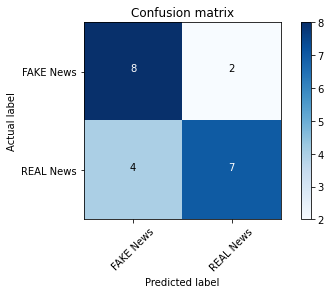

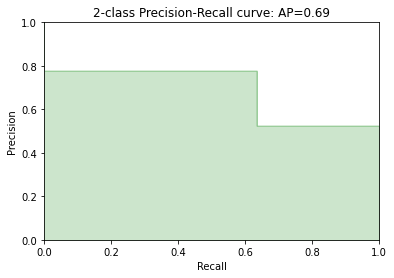

In [48]:
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression(random_state = 100),x_train,y_train,x_test,y_test)


### **MultinomialNB**

Accuracy of the test data set is  0.7619047619047619
average_precision of the test data is 0.696969696969697
Precision of the test data is 0.7142857142857143
Recall of the test data is 0.9090909090909091
Confusion matrix, without normalization


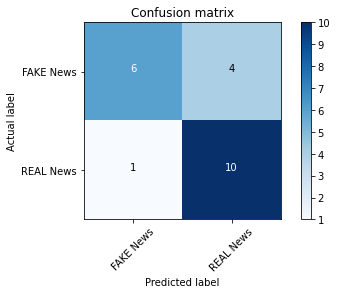

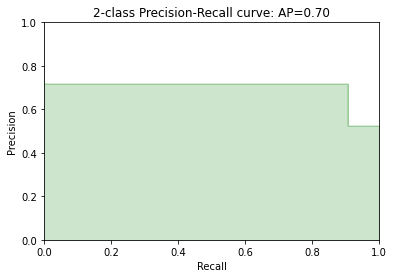

In [49]:
from sklearn.naive_bayes import MultinomialNB
modeling(MultinomialNB(),x_train,y_train,x_test,y_test)

### **Tune hyperparameters**

In [50]:
from sklearn import metrics
classifier_tune=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(x_train,y_train)
  pred_tune=sub_classifier.predict(x_test)
  score_tune = metrics.accuracy_score(y_test, pred_tune)
  if score_tune>previous_score:
    classifier_tune=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score_tune))

Alpha: 0.0, Score : 0.7619047619047619
Alpha: 0.1, Score : 0.7619047619047619
Alpha: 0.2, Score : 0.7619047619047619
Alpha: 0.30000000000000004, Score : 0.7619047619047619
Alpha: 0.4, Score : 0.7619047619047619
Alpha: 0.5, Score : 0.7619047619047619
Alpha: 0.6000000000000001, Score : 0.7619047619047619
Alpha: 0.7000000000000001, Score : 0.7619047619047619
Alpha: 0.8, Score : 0.7619047619047619
Alpha: 0.9, Score : 0.7619047619047619


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### **PassiveAggressiveClassifier**

Accuracy of the test data set is  0.6666666666666666
average_precision of the test data is 0.6645021645021645
Precision of the test data is 0.8333333333333334
Recall of the test data is 0.45454545454545453
Confusion matrix, without normalization


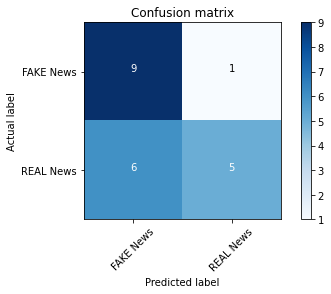

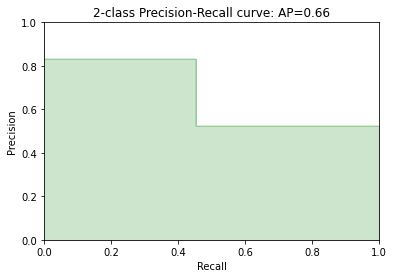

In [51]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
modeling(PassiveAggressiveClassifier(max_iter=50,C = 0.5),x_train,y_train,x_test,y_test)

### **Support Vector Machine**

Accuracy of the test data set is  0.8095238095238095
average_precision of the test data is 0.7893217893217892
Precision of the test data is 0.8888888888888888
Recall of the test data is 0.7272727272727273
Confusion matrix, without normalization


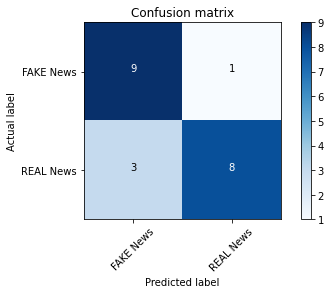

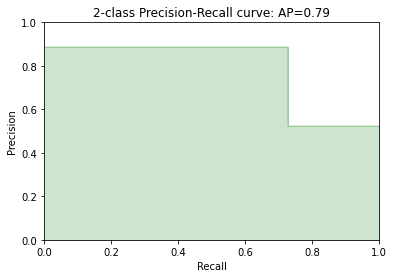

In [52]:
from sklearn.svm import SVC
modeling(SVC(),x_train,y_train,x_test,y_test)

### **Tune Hyper Parameter for SVM**

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0], 
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                               2.0],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                                   2.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [62]:
print(grid.best_estimator_)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [63]:
print(grid.best_score_)

0.892887624466572


In [56]:
grid_predictions = grid.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.90      0.82      0.86        11

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



### **RandomForestClassifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100,n_estimators=20,class_weight='balanced_subsample')


Accuracy of the test data set is  0.8571428571428571
average_precision of the test data is 0.8701298701298701
Precision of the test data is 1.0
Recall of the test data is 0.7272727272727273
Confusion matrix, without normalization


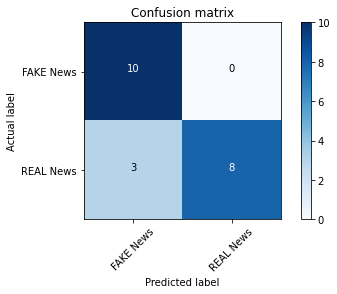

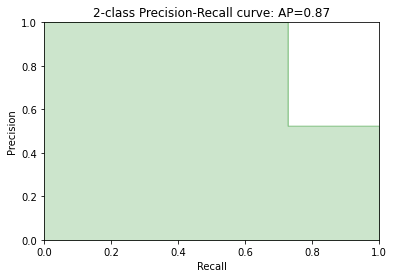

In [67]:
modeling(rf,x_train,y_train,x_test,y_test)

### **Parameter optimization with GridSearchCV**

In [68]:

# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=100)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(x_train,y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 30}

In [74]:
rf_pred=CV_model.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.88      0.64      0.74        11

    accuracy                           0.76        21
   macro avg       0.78      0.77      0.76        21
weighted avg       0.79      0.76      0.76        21



Accuracy of the Logistic Regression in the test data set is  0.7142857142857143


Accuracy of the MultinomialNB test data set is  0.7142857142857143

Accuracy of the SVM test data set is  0.8995238095238095

Accuracy of the Randomforest test data set is  0.8571428571428571

### Conclusion

From our analysis, we could see the accuracy and average precision of each model among them SVM worked with well rather than another model, as well as this model has good accuracy and precision. So, I would say SVM is the best model among them for predicting future values.